# Question 2

In [5]:
import random
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from PIL import Image 
import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from shutil import copyfile
from sklearn.model_selection import train_test_split
from shutil import rmtree
import efficientnet.keras as efn
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install efficientnet

# Executed Once

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.1 MB/s eta 0:00:00


In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:11<00:00, 199MB/s]
100% 2.29G/2.29G [00:11<00:00, 210MB/s]


In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d /content/drive/MyDrive/NN_CA2

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/drive/MyDrive/NN_CA2/chest_xray/

Now we combine all images and then split them again:

In [ ]:
base_path = '/content/drive/MyDrive/NN_CA2/chest_xray'
train_path = base_path + '/train'
val_path = base_path + '/test'
test_path = base_path + '/val'

In [ ]:
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/NORMAL', exist_ok=True)
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/PNEUMONIA', exist_ok=True)
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/train/NORMAL', exist_ok=True)
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/train/PNEUMONIA', exist_ok=True)
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/test/NORMAL', exist_ok=True)
os.makedirs('/content/drive/MyDrive/NN_CA2/chest_xray_splitted/test/PNEUMONIA', exist_ok=True)

In [ ]:
for path in [train_path, test_path, val_path]:
    for dirname, _, filenames in os.walk(path):
        for i, file in enumerate(filenames):
            img_class = dirname.split('/')[7]
            copyfile(os.path.join(dirname, file), '/content/drive/MyDrive/NN_CA2/chest_xray_splitted/' + img_class + '/' + file)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/drive/MyDrive/NN_CA2/chest_xray/train/NORMAL       NORMAL
/content/dr

Now we check how many images are there in new folders:

In [ ]:
images_base_path = "/content/drive/MyDrive/NN_CA2/chest_xray_splitted/"

for dirname, _, filenames in os.walk(images_base_path):
    if(len(dirname.split("/")) > 1 and dirname.split("/")[-1] != ""):
        print(str(len(filenames)) + " files are in " + dirname.split("/")[-1])

1583 files are in NORMAL
4273 files are in PNEUMONIA


Now we split images into train and test:

In [ ]:
train_path = "/content/drive/MyDrive/NN_CA2/chest_xray_splitted/train/"
test_path = "/content/drive/MyDrive/NN_CA2/chest_xray_splitted/test/"

for image_class in ['NORMAL/', 'PNEUMONIA/']:
    train, test = train_test_split(os.listdir(images_base_path + image_class), test_size = 0.2, random_state = 53)
    for image in train:
        copyfile(os.path.join(images_base_path + image_class, image), os.path.join(train_path + image_class, image))
    for image in test:
        copyfile(os.path.join(images_base_path + image_class, image), os.path.join(test_path + image_class, image))

# Preprocessing

In [7]:
train_path = "/content/drive/MyDrive/NN_CA2/chest_xray_splitted/train/"
test_path = "/content/drive/MyDrive/NN_CA2/chest_xray_splitted/test/"

Images are splitted and saved in Drive. Now we show some images and then we do other preprocessings.

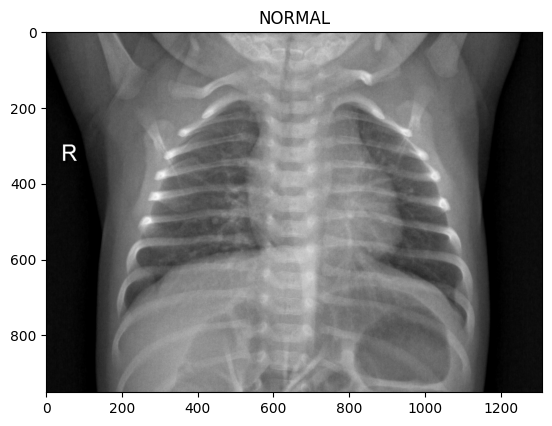

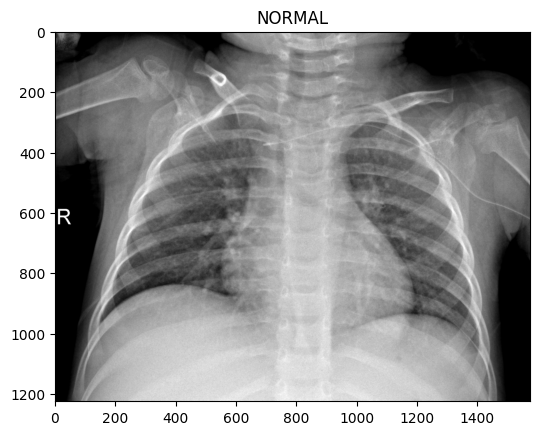

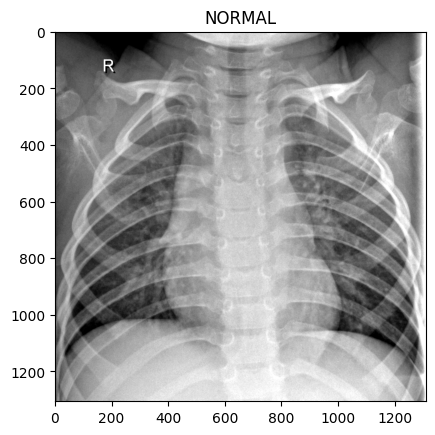

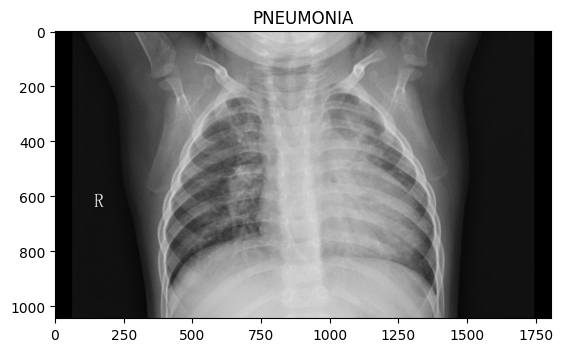

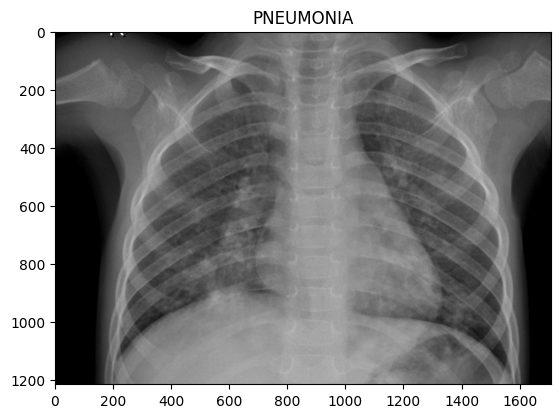

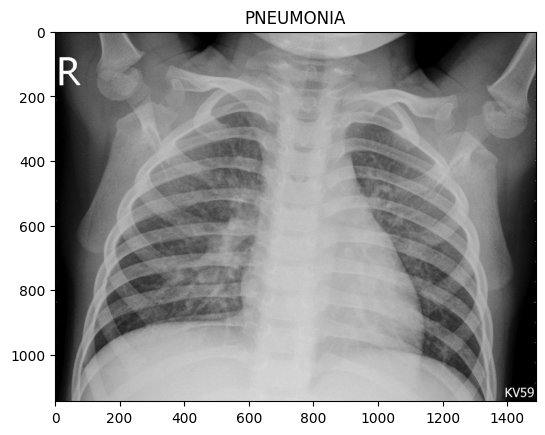

In [8]:
images_to_show = {}

for dirname, _, filenames in os.walk(train_path):
    if dirname.split('/')[-1] != "":
        images_to_show[dirname.split('/')[-1]] = random.choices(filenames, k = 3)

for image_class in images_to_show:
    for images in images_to_show[image_class]:
        plt.imshow(mpimg.imread(os.path.join(train_path + image_class + '/', images)), cmap='gray')
        plt.title(image_class)
        plt.show()

---

In [9]:
SIZE = 128
BATCH = 64
CLASSES = 2
num_classes = 2

train_gen = ImageDataGenerator( rescale = 1.0/255,
                                shear_range = 0.2,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                rotation_range = 30,
                                horizontal_flip = True,
                                zoom_range = 0.2, 
                                validation_split = 0.25)
                                        

train_generator = train_gen.flow_from_directory(directory = train_path,
                                                target_size = (SIZE, SIZE), 
                                                batch_size = BATCH,
                                                shuffle = True,
                                                class_mode = 'binary',
                                                subset='training')

validation_generator = train_gen.flow_from_directory(directory = train_path,
                                                    target_size = (SIZE, SIZE), 
                                                    batch_size = BATCH,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    subset='validation')

Found 3431 images belonging to 2 classes.
Found 1143 images belonging to 2 classes.


**Applying Techniques of Data Augmentation:**
 
*   Re-scale____1.0/255
*   Shear Range____0.2
*   Width Shift Range____0.2
*   Height Shift Range____0.2
*   Rotation Range____30
*   Horizontal Flip____True
*   Zoom Range____0.2

    

Load the training and validation data with data augmentation and preprocessing

In [10]:
SIZE = 128
BATCH = 64
CLASSES = 2
num_classes = 2

train_gen = ImageDataGenerator( rescale = 1.0/255,
                                shear_range = 0.2,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                rotation_range = 30,
                                horizontal_flip = True,
                                zoom_range = 0.2, 
                                validation_split = 0.25)
                                        

train_generator = train_gen.flow_from_directory(directory = train_path,
                                                target_size = (SIZE, SIZE), 
                                                batch_size = BATCH,
                                                shuffle = True,
                                                class_mode = 'binary',
                                                subset='training')

validation_generator = train_gen.flow_from_directory(directory = train_path,
                                                    target_size = (SIZE, SIZE), 
                                                    batch_size = BATCH,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    subset='validation')

print(validation_generator.class_indices)

Found 3438 images belonging to 2 classes.
Found 1145 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


Set the random seeds for reproducibility

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

here we calculate the class weights to address class imbalance. Then we load the EfficientNet-B2 model with pre-trained weights. And finaly we freeze the earlier layers to extract common low-level features.

In [12]:
class_weights_list = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_generator.classes),
                                     y = train_generator.classes)

class_weights = {0: class_weights_list[1], 1: class_weights_list[0]}
# print(type(class_weights))
# print(class_weights)

base_model = EfficientNetB2(weights='imagenet', 
                            include_top = False, 
                            input_shape = (SIZE, SIZE, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

31790344/31790344 [==============================] - 0s 0us/step


Defining layers (according to article):

In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

Compiling the model:

In [14]:
optimizer = Adam(lr=0.001)
loss = 'binary_crossentropy'
metrics = ['accuracy', Recall(), Precision()]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Define the learning rate schedule, model checkpoint, and early stopping callbacks:

In [15]:
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(lr_schedule)

model_checkpoint = ModelCheckpoint('best_model.h5', 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   monitor='val_loss', 
                                   mode='min', 
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience=10, 
                               verbose=1)

Train the model on the new dataset with the class weights and callbacks:

In [16]:
history = model.fit(train_generator, 
                    epochs = 15, 
                    # batch_size = 128,
                    validation_data = validation_generator, 
                    steps_per_epoch=train_generator.n/BATCH,
                    validation_steps=validation_generator.n/BATCH,
                    class_weight = class_weights,
                    callbacks = [lr_scheduler, model_checkpoint, early_stopping])

Epoch 1/15
54/53 [==============================] - ETA: -3s - loss: 0.6108 - accuracy: 0.7216 - recall: 0.9952 - precision: 0.7238
Epoch 1: val_loss improved from inf to 0.83287, saving model to best_model.h5
53/53 [==============================] - 957s 17s/step - loss: 0.6108 - accuracy: 0.7216 - recall: 0.9952 - precision: 0.7238 - val_loss: 0.8329 - val_accuracy: 0.7240 - val_recall: 1.0000 - val_precision: 0.7240 - lr: 0.0010
Epoch 2/15
54/53 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.7237 - recall: 1.0000 - precision: 0.7237
Epoch 2: val_loss improved from 0.83287 to 0.69545, saving model to best_model.h5
53/53 [==============================] - 75s 1s/step - loss: 0.5976 - accuracy: 0.7237 - recall: 1.0000 - precision: 0.7237 - val_loss: 0.6955 - val_accuracy: 0.7240 - val_recall: 1.0000 - val_precision: 0.7240 - lr: 0.0010
Epoch 3/15
54/53 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.7237 - recall: 1.0000 - precision: 0.7

Evaluate the model on the test dataset:


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(SIZE, SIZE),
                                                  batch_size=32,
                                                  class_mode='binary')

test_result = model.evaluate(test_generator)

Found 1172 images belonging to 2 classes.
37/37 [==============================] - 15s 401ms/step - loss: 0.6052 - accuracy: 0.7295 - recall: 1.0000 - precision: 0.7295


In [21]:
print("Test Result: ", test_result)

Test Result:  [0.6051517128944397, 0.729522168636322, 1.0, 0.729522168636322]


In [44]:
model = efn.EfficientNetB4(weights = 'imagenet', 
                           include_top = False, 
                           input_shape = (SIZE, SIZE, 3))

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(), Precision()])

model_history = model.fit(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n/BATCH,
                            validation_steps=validation_generator.n/BATCH,
                            class_weight = class_weights,
                            epochs=15,
                            verbose=1,
                            callbacks=[lr_scheduler, model_checkpoint, early_stopping])

Epoch 1/15
54/53 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.9026 - recall_7: 0.9662 - precision_7: 0.9055
Epoch 1: val_loss improved from 2.16270 to 0.47811, saving model to best_model.h5
53/53 [==============================] - 173s 2s/step - loss: 0.2893 - accuracy: 0.9026 - recall_7: 0.9662 - precision_7: 0.9055 - val_loss: 0.4781 - val_accuracy: 0.8646 - val_recall_7: 0.9891 - val_precision_7: 0.8489 - lr: 0.0010
Epoch 2/15
54/53 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.9241 - recall_7: 0.9751 - precision_7: 0.9242
Epoch 2: val_loss did not improve from 0.47811
53/53 [==============================] - 81s 2s/step - loss: 0.1888 - accuracy: 0.9241 - recall_7: 0.9751 - precision_7: 0.9242 - val_loss: 0.5964 - val_accuracy: 0.9013 - val_recall_7: 0.9819 - val_precision_7: 0.8925 - lr: 0.0010
Epoch 3/15
54/53 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9407 - recall_7: 0.9835 - precision_7: 0.9375
E

<Figure size 640x480 with 0 Axes>

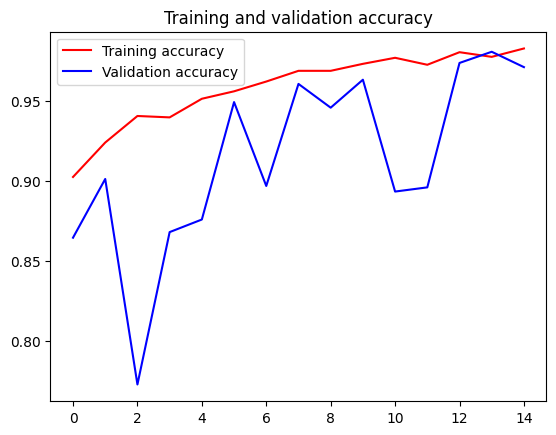

<Figure size 640x480 with 0 Axes>

In [45]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [56]:
print("---- TRAIN ----")
print("Accuracy : ", model_history.history['accuracy'][-1])
print("F1-score : ", model_history.history['recall_7'][-1])
print("Precision : ", model_history.history['precision_7'][-1])

print("---- VALIDATION ----")
print("Accuracy : ", model_history.history['val_accuracy'][-1])
print("F1-score : ", model_history.history['val_recall_7'][-1])
print("Precision : ", model_history.history['val_precision_7'][-1])

---- TRAIN ----
Accuracy :  0.9828388690948486
F1-score :  0.9947749376296997
Precision :  0.9817532896995544
---- VALIDATION ----
Accuracy :  0.9711790680885315
F1-score :  0.9927623867988586
Precision :  0.9682353138923645


In [65]:
test_gen = ImageDataGenerator( rescale = 1.0/255,
                                shear_range = 0.2,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                rotation_range = 30,
                                horizontal_flip = True,
                                zoom_range = 0.2, 
                                validation_split = 0.25)
                                        

test_generator = test_gen.flow_from_directory(directory = test_path,
                                              target_size = (SIZE, SIZE), 
                                              batch_size = BATCH,
                                              shuffle = False,
                                              class_mode = 'binary')


preds = model.predict(test_generator)

Found 1172 images belonging to 2 classes.
19/19 [==============================] - 21s 996ms/step


In [66]:
labels = 1*(preds > 0.5)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       317
           1       0.96      0.99      0.98       855

    accuracy                           0.96      1172
   macro avg       0.97      0.94      0.95      1172
weighted avg       0.96      0.96      0.96      1172



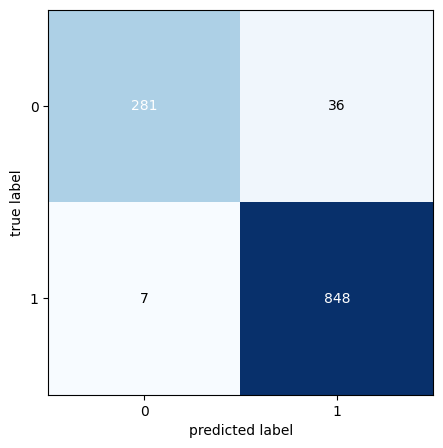

In [67]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
CM = confusion_matrix(test_generator.classes, labels)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

<Figure size 640x480 with 0 Axes>

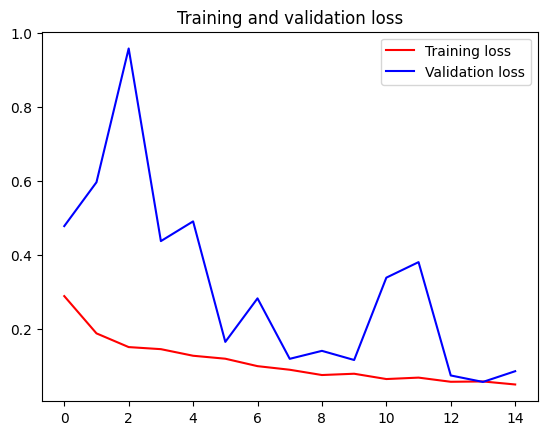

<Figure size 640x480 with 0 Axes>

In [72]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

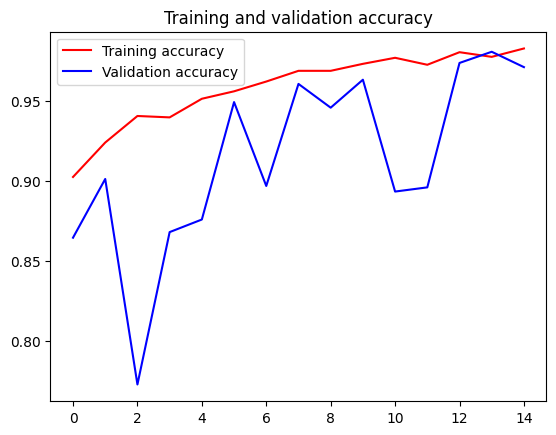

<Figure size 640x480 with 0 Axes>

In [73]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

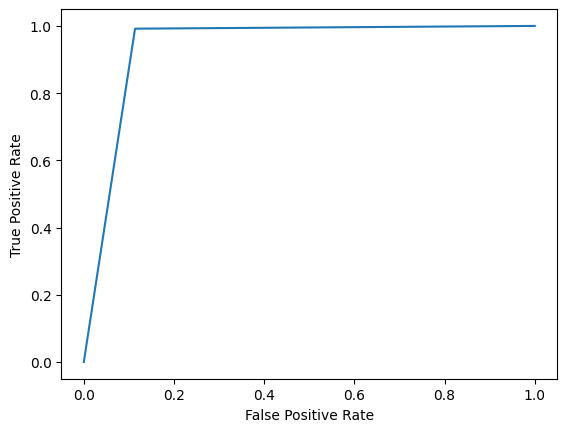

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(test_generator.classes, labels)